## Data Load and Split

In [1]:
import numpy as np
data = np.loadtxt("training.txt")
print(data.shape)

#shuffling the data
np.random.shuffle(data)

#spliting Data
train_x = data[:,0:2]
train_y = data[:,-1]
print("train_x shape:"+str(train_x.shape))
print("train_y shape:"+str(train_y.shape))

(1000, 3)
train_x shape:(1000, 2)
train_y shape:(1000,)


## Creating functions and Class

In [2]:
#actiavtion function
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

In [3]:
#fully conneted network
class ann:
    def __init__(self, input_size, hidden_size,output_size):
        #setting the shape of the layer and putting random inital value 
        self.params = {}
        self.params['W1'] = np.random.randn(input_size,hidden_size)
        self.params['W2'] = np.random.randn(hidden_size,output_size)
    
    #Calculating the Values
    def gradient(self, x, y):
        
        #forward
        W1,W2 = self.params['W1'],self.params['W2']
        U = np.dot(x,W1)
        H = sigmoid(U)
        
        U2 = np.dot(H,W2)
        Y = sigmoid(U2)
        
        #backpropagation
        
        ERR2 = (Y-y)*Y*(1-Y)
        ERR = np.dot((ERR2 * W2),np.dot(H,1-H))
        

        return ERR,ERR2,H,Y
        

## Creating Fullyconnected-NN With Class

In [4]:
n_network = ann(input_size = 2,hidden_size = 8,output_size = 1)

#checking the created network shape
print(n_network.params['W1'].shape)
print(n_network.params['W2'].shape)

(2, 8)
(8, 1)


In [5]:
#setting the hyperparamter
epoch = 50
batch_size = 1
n_iterations =int(train_x.shape[0] / batch_size)
learning_rate = 0.01

In [6]:
epoch_loss = []
for i in range(epoch):
    #iter_loss = []
    predict_y = []
    for j in range(n_iterations):
        
        ERR,ERR2,H,Y = n_network.gradient(train_x[j],train_y[j])
        
        #UPDATING Params "W1,W2"
        n_network.params['W1'] -= (learning_rate * ERR * train_x[i]).T
        n_network.params['W2'] -= np.reshape(learning_rate * ERR2 * H, (8,1))
        predict_y.append(Y)
    
    loss = np.mean(((train_y - np.reshape(predict_y, (1000, )))**2)/2)
    epoch_loss.append(loss)

## Loss Graph

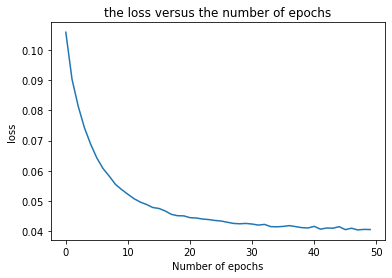

In [8]:
from matplotlib import pyplot as plt
plt.plot(epoch_loss)
plt.title("the loss versus the number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.show()